In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [7]:
data = {
    'name': pd.Series(['Aadit', 'Abhinash', 'Abhinav', 'Adarsh', 'Aditya', 'Gaurav', 'Gulshan', 'Lokendra', 'Krishan', 'Mahindra', 'Priyanshu', 'Sachin', 'Sahil', 'Suraj', 'Shashank']),
    'batch': pd.Series(['T4', 'T4', 'T4', 'T4', 'T4', 'T5', 'T5', 'T5', 'T5', 'T5', 'T6', 'T6', 'T6', 'T6', 'T6']),
    'marks1': pd.Series([45, 54, 48, np.nan, 56, 45, 48, 52, 54, 50, 49, 46, 48, 49, 50]),
    'marks2': pd.Series([45, 54, 48, 49, 56, 45, np.nan, 52, 54, 50, 49, 46, 48, 49, 50]),
    'marks3': pd.Series([45, 54, 48, 49, 56, 45, 35, 52, 54, 50, 49, 46, np.nan, 49, 50])
}

df = pd.DataFrame(data);

In [9]:
print(df.columns);

Index(['name', 'batch', 'marks1', 'marks2', 'marks3'], dtype='object')


In [11]:
print(df.head());

       name batch  marks1  marks2  marks3
0     Aadit    T4    45.0    45.0    45.0
1  Abhinash    T4    54.0    54.0    54.0
2   Abhinav    T4    48.0    48.0    48.0
3    Adarsh    T4     NaN    49.0    49.0
4    Aditya    T4    56.0    56.0    56.0


In [13]:
print(df.tail());

         name batch  marks1  marks2  marks3
10  Priyanshu    T6    49.0    49.0    49.0
11     Sachin    T6    46.0    46.0    46.0
12      Sahil    T6    48.0    48.0     NaN
13      Suraj    T6    49.0    49.0    49.0
14   Shashank    T6    50.0    50.0    50.0


In [15]:
print(df.dtypes);

name       object
batch      object
marks1    float64
marks2    float64
marks3    float64
dtype: object


In [17]:
df.describe();

In [19]:
print(df.describe());

          marks1     marks2     marks3
count  14.000000  14.000000  14.000000
mean   49.571429  49.642857  48.714286
std     3.390355   3.365141   5.165396
min    45.000000  45.000000  35.000000
25%    48.000000  48.000000  46.500000
50%    49.000000  49.000000  49.000000
75%    51.500000  51.500000  51.500000
max    56.000000  56.000000  56.000000


In [21]:
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    15 non-null     object 
 1   batch   15 non-null     object 
 2   marks1  14 non-null     float64
 3   marks2  14 non-null     float64
 4   marks3  14 non-null     float64
dtypes: float64(3), object(2)
memory usage: 732.0+ bytes
None


In [23]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 name      0
batch     0
marks1    1
marks2    1
marks3    1
dtype: int64


In [25]:
df['marks1'].fillna(df['marks1'].mean())

0     45.000000
1     54.000000
2     48.000000
3     49.571429
4     56.000000
5     45.000000
6     48.000000
7     52.000000
8     54.000000
9     50.000000
10    49.000000
11    46.000000
12    48.000000
13    49.000000
14    50.000000
Name: marks1, dtype: float64

In [27]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 name      0
batch     0
marks1    1
marks2    1
marks3    1
dtype: int64


In [31]:
df['marks1'].fillna(df['marks1'].mean())
df['marks2'].fillna(df['marks2'].mean())
df['marks3'].fillna(df['marks3'].mean())

0     45.000000
1     54.000000
2     48.000000
3     49.000000
4     56.000000
5     45.000000
6     35.000000
7     52.000000
8     54.000000
9     50.000000
10    49.000000
11    46.000000
12    48.714286
13    49.000000
14    50.000000
Name: marks3, dtype: float64

In [33]:
print(df.head());

       name batch     marks1  marks2  marks3
0     Aadit    T4  45.000000    45.0    45.0
1  Abhinash    T4  54.000000    54.0    54.0
2   Abhinav    T4  48.000000    48.0    48.0
3    Adarsh    T4  49.571429    49.0    49.0
4    Aditya    T4  56.000000    56.0    56.0


In [35]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 name      0
batch     0
marks1    0
marks2    0
marks3    0
dtype: int64


In [39]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound) ]
    

In [41]:
outliers_marks1 = detect_outliers_iqr(df['marks1'])
outliers_marks2 = detect_outliers_iqr(df['marks2'])
outliers_marks3 = detect_outliers_iqr(df['marks3'])

In [43]:
print("\nOutliers in marks1:\n", outliers_marks1)
print("\nOutliers in marks2:\n", outliers_marks2)
print("\nOutliers in marks3:\n", outliers_marks3)


Outliers in marks1:
 4    56.0
Name: marks1, dtype: float64

Outliers in marks2:
 4    56.0
Name: marks2, dtype: float64

Outliers in marks3:
 6    35.0
Name: marks3, dtype: float64


In [45]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower, np.where(series > upper, upper, series))

In [47]:
df['marks1'] = cap_outliers(df['marks1'])
df['marks2'] = cap_outliers(df['marks2'])
df['marks3'] = cap_outliers(df['marks3'])

In [49]:
print("Skewness before transformation:", df['marks3'].skew())

Skewness before transformation: -0.16341341056093064


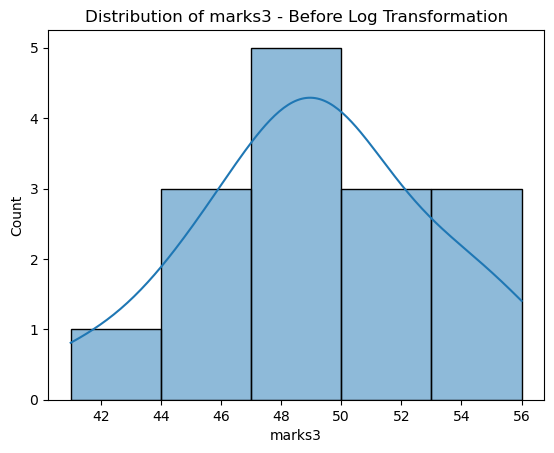

In [51]:
sns.histplot(df['marks3'], kde=True)
plt.title("Distribution of marks3 - Before Log Transformation")
plt.show()

In [53]:
df['log_marks3'] = np.log(df['marks3'] + 1)

In [55]:
print("Skewness after transformation:", df['log_marks3'].skew())

Skewness after transformation: -0.3872295243791056


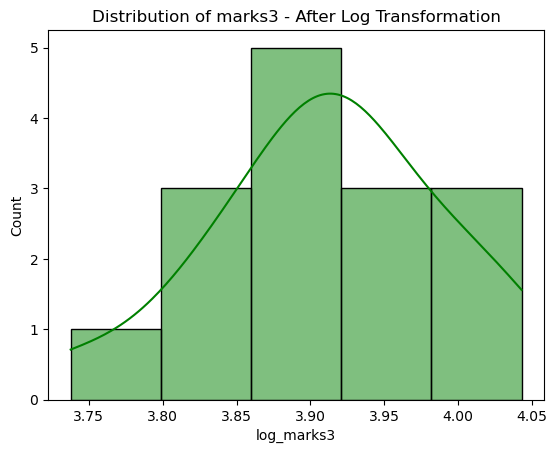

In [57]:
sns.histplot(df['log_marks3'], kde=True, color='green')
plt.title("Distribution of marks3 - After Log Transformation")
plt.show()